In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from datetime import datetime

In [2]:
stock = pd.read_csv("Desktop\stock.csv")
stock.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,21-09-2018,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,19-09-2018,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,18-09-2018,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,17-09-2018,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,14-09-2018,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [3]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

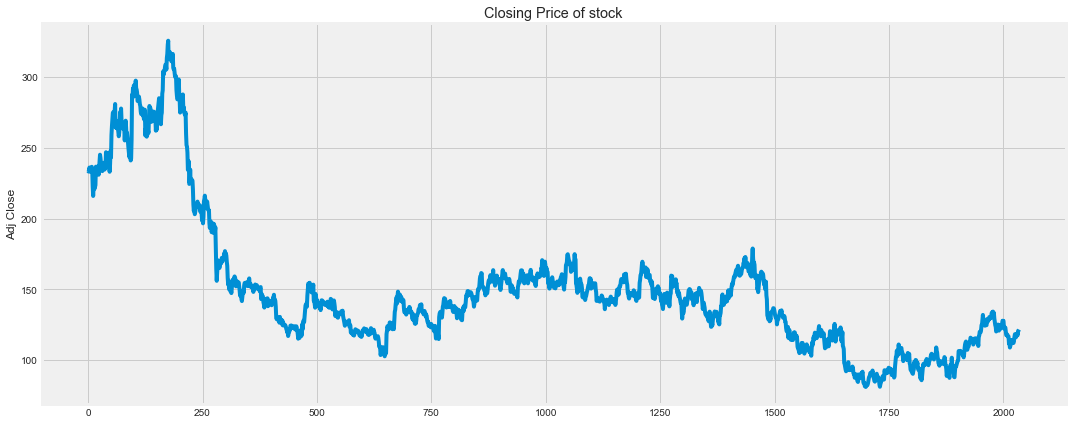

In [7]:
plt.figure(figsize=(15, 6))
stock['Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of stock")
    
plt.tight_layout()

# volume of stock being traded each day

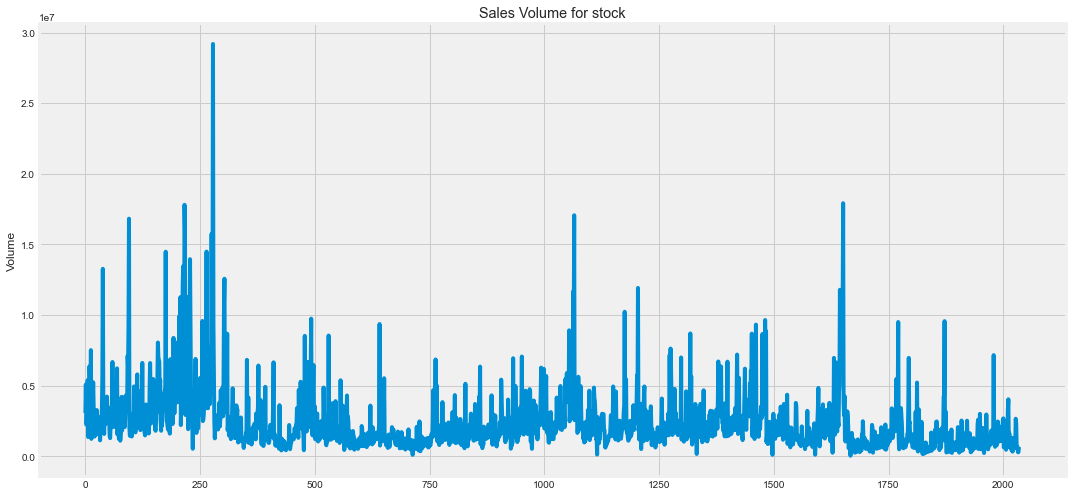

In [8]:
plt.figure(figsize=(15, 7))

stock['Total Trade Quantity'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for stock")
    
plt.tight_layout()

In [9]:
stock['Daily Return'] = stock['Close'].pct_change()

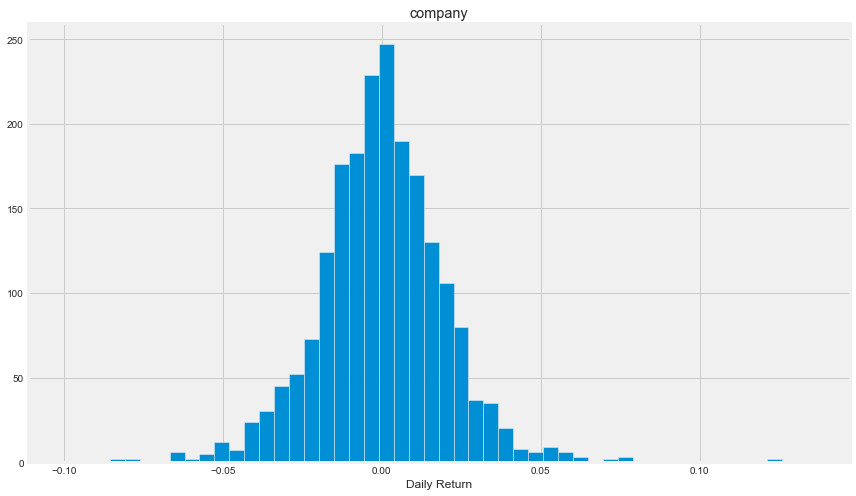

In [10]:
plt.figure(figsize=(12, 7))

stock['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.title(f'company')
    
plt.tight_layout()

<AxesSubplot:>

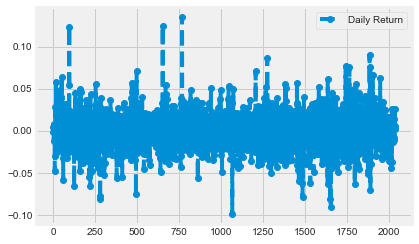

In [11]:
stock['Daily Return'].plot(legend=True, linestyle='--', marker='o')

In [12]:
closing_df = stock['Close']
closing_df.head() 

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

0         NaN
1   -0.002139
2    0.004287
3    0.007898
4   -0.011859
Name: Close, dtype: float64

In [14]:
tech_rets.to_frame()

,Close
0,NaN
1,-0.002139
2,0.004287
3,0.007898
4,-0.011859
...,...
2030,0.003383
2031,-0.008850
2032,0.025935
2033,0.002072


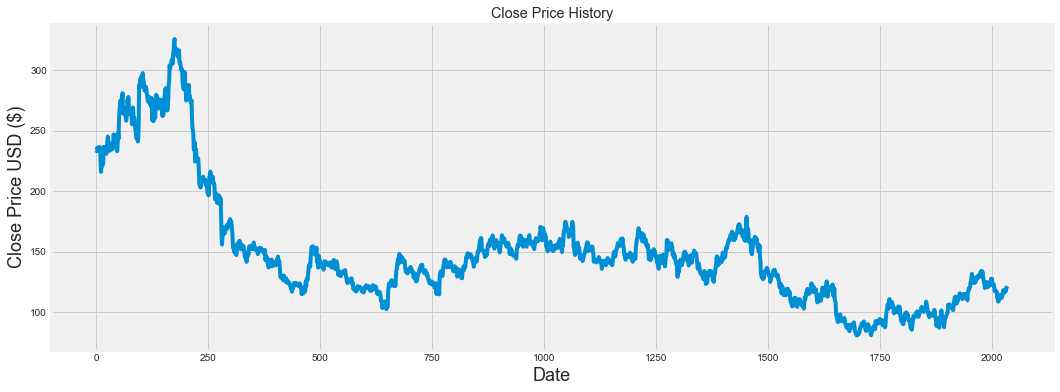

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create a new dataframe with only the 'Close column 

In [16]:
data = stock.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1934


# Scale the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Create the training data set 
# Create the scaled training data set

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771])]
[0.7495915032679739]

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.576

In [25]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1874/1874 [==============================] - 86s 40ms/step - loss: 0.0017


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 

In [26]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.320414012038656

# Plot the data

C:\Users\hp\AppData\Local\Temp/ipykernel_2492/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


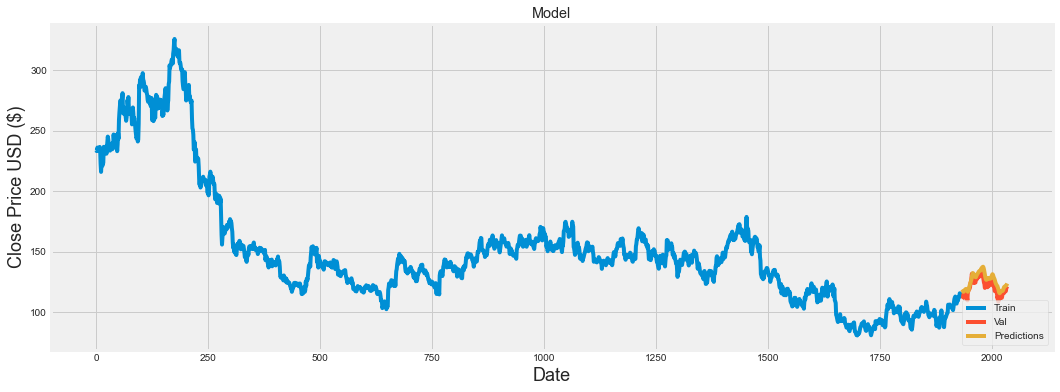

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
1934,110.95,118.962654
1935,111.50,117.932579
1936,114.85,117.050484
1937,115.25,117.169533
1938,114.95,117.801918
...,...,...
2030,118.65,121.758133
2031,117.60,122.201279
2032,120.65,122.361870
2033,120.90,123.035522
